<a href="https://colab.research.google.com/github/Kalisa21/sound_cluster/blob/main/Sound_Clustering_%26_HMMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Loading and Feature Extraction

In [ ]:
import os
import librosa
import numpy as np
import pandas as pd

# Path to sound files (replace with your path in Colab or local env)
audio_dir = '/content/drive/MyDrive/unlabelled_sounds'
sample_rate = 220

features = []
file_names = []

# Load audio and extract Mel spectrogram mean
for file in os.listdir(audio_dir):
    if file.endswith('.wav'):
        y, sr = librosa.load(os.path.join(audio_dir, file), sr=sample_rate)
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
        mel_db = librosa.power_to_db(mel_spec, ref=np.max)
        mel_mean = np.mean(mel_db, axis=1)
        features.append(mel_mean)
        file_names.append(file)

X = pd.DataFrame(features)
X['file'] = file_names
X_features = X.drop('file', axis=1)
X.head()


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=91
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=59
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=60
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=39
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=119
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=106
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: User

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,file
0,-22.355949,-20.156204,-18.998245,-18.136364,-18.623535,-22.270405,-30.671688,-24.988922,-22.680237,-22.340069,...,-0.494211,-1.955620,-2.876751,-3.811310,-6.850452,-13.829220,-22.823765,-23.473236,-27.569729,0.wav
1,-5.971807,-6.897711,-9.412252,-14.100676,-13.407290,-9.154760,-7.649157,-8.698042,-12.095812,-13.270979,...,-0.556459,0.000000,-1.113241,-3.863653,-8.441412,-14.227377,-15.921328,-15.277811,-15.801012,184.wav
2,-24.320034,-21.118309,-20.536079,-20.743183,-19.846565,-18.864956,-19.597198,-23.080273,-26.260834,-21.843811,...,-0.514587,0.000000,-0.173721,-1.170242,-3.099174,-6.079437,-10.159325,-14.555267,-16.460056,74.wav
3,-5.041500,-6.041817,-7.837814,-10.694794,-15.158981,-20.897015,-18.861282,-15.044571,-13.188828,-12.724712,...,-0.322014,0.000000,-0.508106,-1.915562,-4.462708,-8.790817,-16.851246,-18.639866,-12.733223,138.wav
4,-51.010410,-45.111832,-44.756123,-42.890499,-39.549194,-41.459614,-41.228104,-38.704491,-41.106083,-39.345425,...,-8.340178,-7.359181,-8.170429,-11.743378,-18.380234,-24.747042,-28.230066,-32.356773,-34.985645,2933.wav


## Initial Visualization Without Dimensionality Reduction

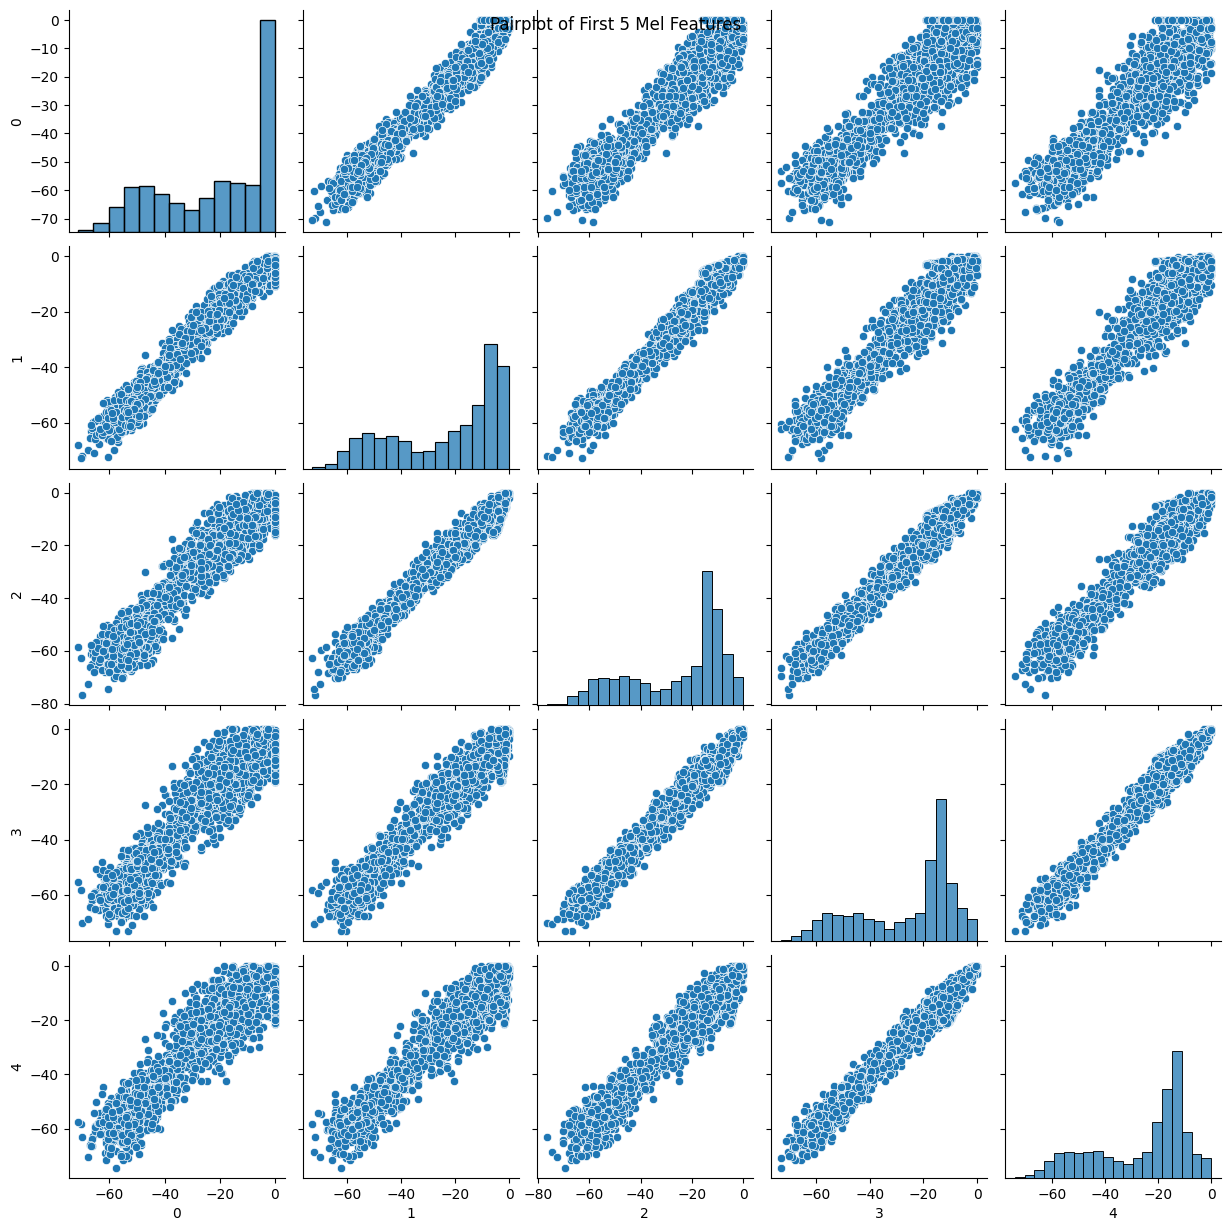

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot of first 5 Mel features
sns.pairplot(X_features.iloc[:, :5])
plt.suptitle("Pairplot of First 5 Mel Features")
plt.show()

### Why is dimensionality reduction important?

When attempting to visualize high-dimensional data such as 128 Mel features per sample, standard plots become overcrowded and fail to reveal clear patterns. In this task, plotting just the first 5 dimensions already showed overlapping and indistinguishable clusters. Dimensionality reduction helps to simplify the data for visualization and improves clustering performance by removing noise and emphasizing structure.


PCA and t-SNE (3D Visualization)

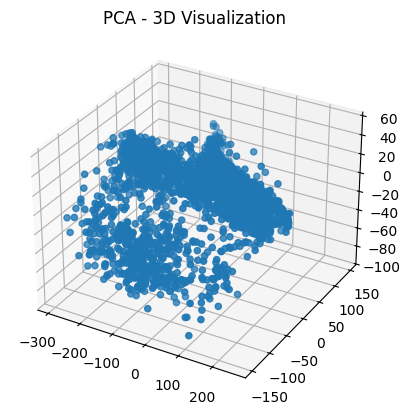

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


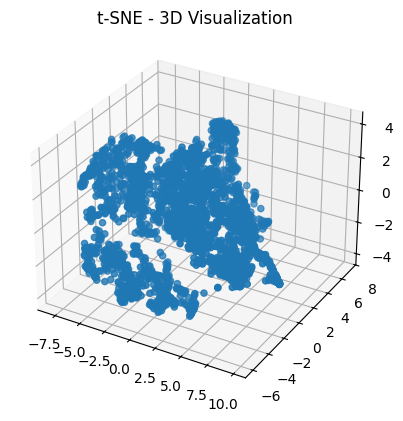

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

# PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_features)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2])
ax.set_title("PCA - 3D Visualization")
plt.show()

# t-SNE
tsne_result = TSNE(n_components=3, perplexity=30, n_iter=300, random_state=42).fit_transform(X_features)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2])
ax.set_title("t-SNE - 3D Visualization")
plt.show()

### Which method provides better separability?

t-SNE yielded more compact and visually distinct clusters than PCA. PCA, being a linear technique, spreads the data across components but fails to preserve non-linear relationships. In contrast, t-SNE better retains local distances and reveals natural groupings that are crucial for unsupervised clustering tasks.


## K-Means and DBSCAN Clustering

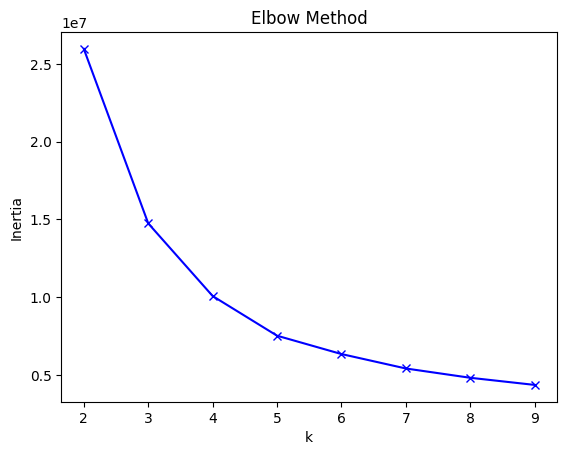

K-Means:
Silhouette Score: 0.5508669
Davies-Bouldin Index: 0.6499754440221678

DBSCAN:
Silhouette Score: -0.47564128
Davies-Bouldin Index: 1.284439507595581


In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

# K-Means Elbow Method
inertias = []
silhouettes = []

for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(pca_result)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(pca_result, km.labels_))

# Plot Elbow
plt.plot(range(2, 10), inertias, 'bx-')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

# Final KMeans and DBSCAN
kmeans = KMeans(n_clusters=3, random_state=42).fit(pca_result)
dbscan = DBSCAN(eps=5, min_samples=5).fit(pca_result)

# Evaluate
print("K-Means:")
print("Silhouette Score:", silhouette_score(pca_result, kmeans.labels_))
print("Davies-Bouldin Index:", davies_bouldin_score(pca_result, kmeans.labels_))

print("\nDBSCAN:")
print("Silhouette Score:", silhouette_score(pca_result, dbscan.labels_))
print("Davies-Bouldin Index:", davies_bouldin_score(pca_result, dbscan.labels_))

### Clustering Results Summary (K-Means vs DBSCAN)

K-Means clustering performed significantly better with a Silhouette Score of 0.55 and a Davies-Bouldin Index of 0.65, indicating dense and well-separated clusters. In contrast, DBSCAN produced a negative Silhouette Score (-0.48) and a high DB Index (1.28), reflecting poor structure and scattered grouping. DBSCAN likely misclassified points as noise due to suboptimal `eps` or density parameters. Overall, K-Means is the more effective clustering algorithm for this dataset.
